In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx


# Step1:understanding the business problem

* Total sales by different groups
    * sales by retailer
    * sales by region
    * sales by products
    * sales by method
* Total sales trend over years


# Step 2 data collection (done)

In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx')

# Drop rows 1 to 3
df = df.drop(df.index[0:3])

# Drop the first column
df = df.iloc[:, 1:]

# Reset the first row as the header
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Reset the index if needed
df = df.reset_index(drop=True)

# Print the modified DataFrame
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


# step 3 Data cleaning and preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [4]:
# drop duplicate data
df=df.drop_duplicates()

# convert data type
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

# Convert specific columns to float
cols_to_convert = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
df[cols_to_convert] = df[cols_to_convert].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


# step 4 Exploratoty Data Analysis(EDA)

In [5]:
#describe data in statistics
df.describe()

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


# sales by different groups

In [6]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [7]:
import matplotlib.pyplot as plt

def vis(col_name):
    # Group by 'retailer' and sum 'total revenue'
    revenue_by_group = df.groupby(col_name)['Total Sales'].sum()
    # Sort by total revenue in descending order
    revenue_by_group_sorted = revenue_by_group.sort_values(ascending=False)

    # Plot bar chart
    ax = revenue_by_group_sorted.plot(kind='bar')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales by {col_name}')

    # Display the number on each bar
    for i, v in enumerate(revenue_by_group_sorted):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

    # Plot pie chart
    revenue_by_group_sorted.plot(kind='pie', autopct='%1.1f%%')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales by {col_name}')
    plt.show()

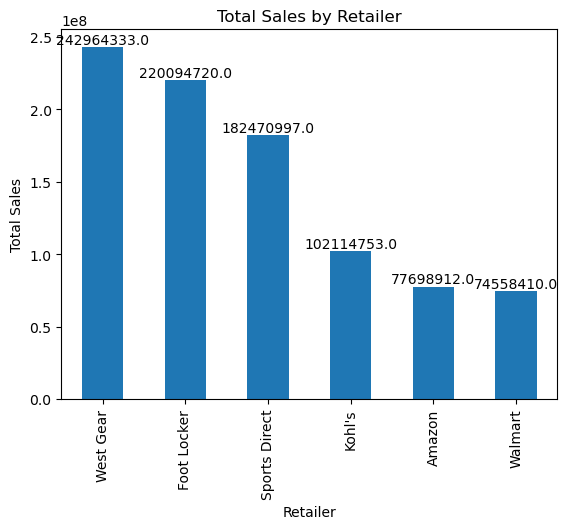

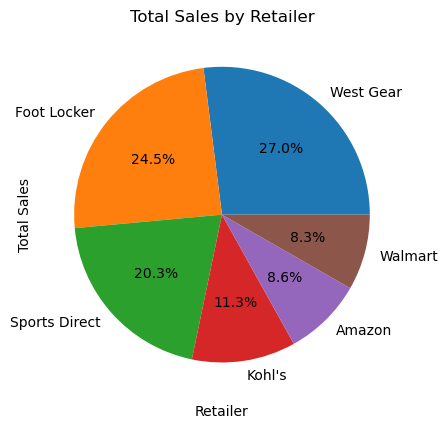

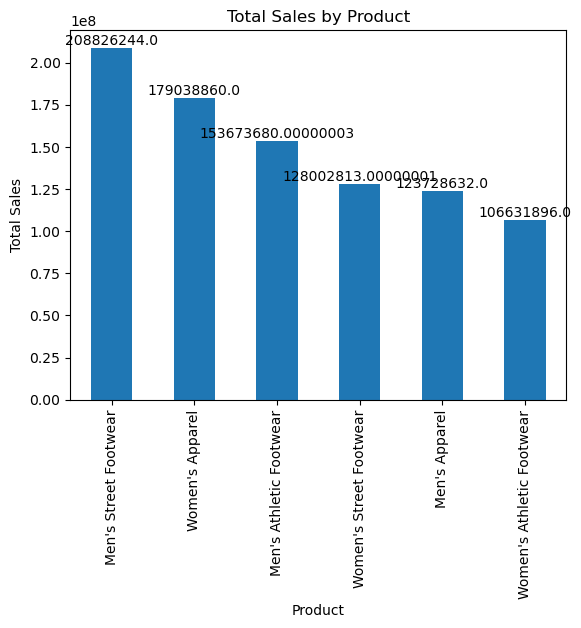

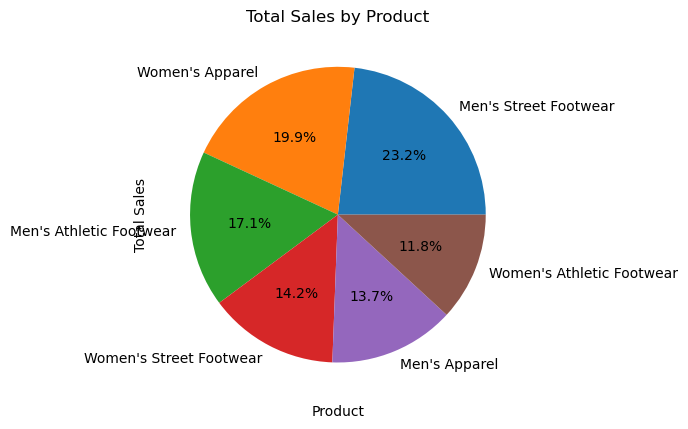

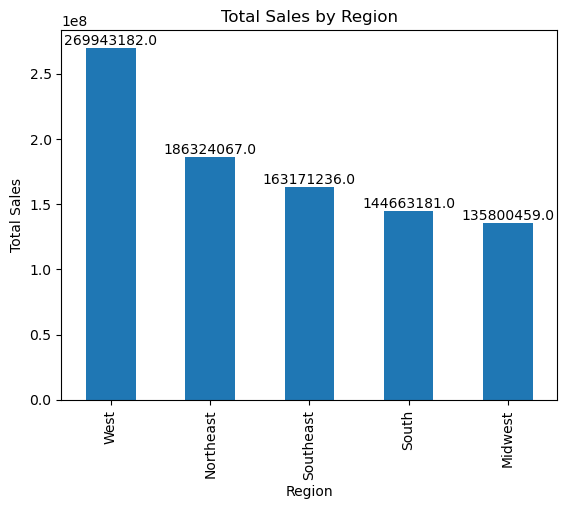

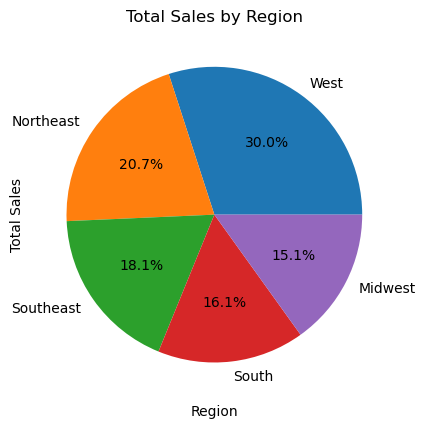

In [8]:
# store all the cols want to explore into a list
col_name_list=['Retailer','Product','Region']

# run function multiple times
for col_name in col_name_list:
    vis(col_name)

In [9]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1234.80,0.42,Outlet


# Sales trend over time

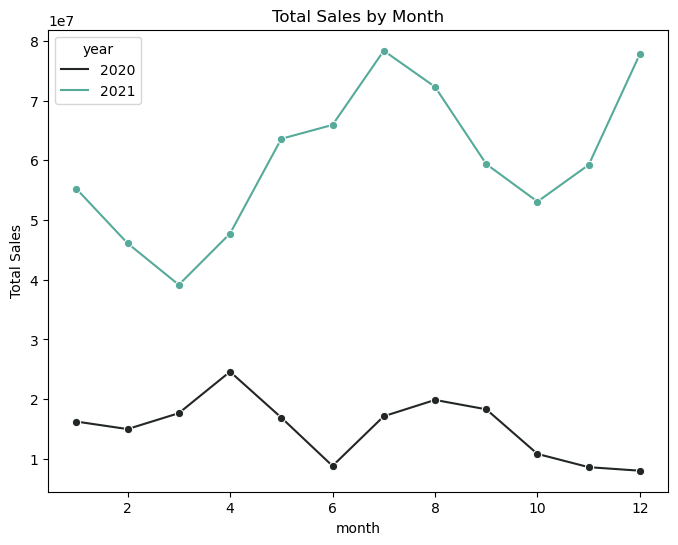

In [10]:
# Extract month and year from 'day' column
df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year

#group by  month and sum the sales
sales_by_month = df.groupby(['year','month'])['Total Sales'].sum().reset_index()


# Set a new color palette for hue

palette=sns.color_palette('dark:#5A9',as_cmap=True)

# Plot line chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.lineplot(data=sales_by_month, x='month', y='Total Sales',hue='year',marker='o',palette=palette)

# Set labels and title
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the line chart
plt.show()


# Step 5 Hypothesis testing (t-test)

* The t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. 
* In a business context, it can be useful for comparing sales, profits, or other metrics across different groups, such as regions, products, or time periods.

## Region Sales Comparison

T-Test Result:
We'll conduct the t-test to compare the total sales between the "West" and "Northeast" regions.

* Null Hypothesis (H0): There is no significant difference in total sales between the West and Northeast regions.
* Alternative Hypothesis (H1): There is a significant difference in total sales between the West and Northeast regions.

In [11]:
sales_data=df

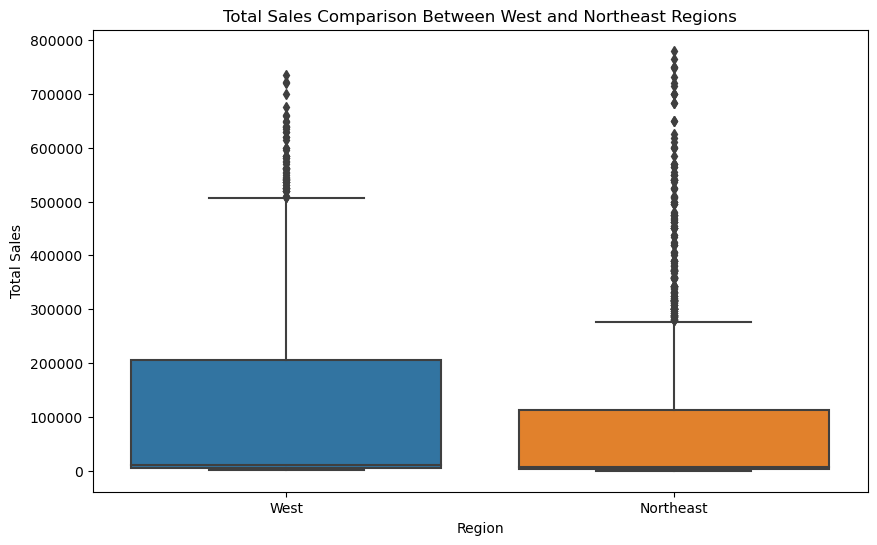

In [12]:
# Filtering data for "West" and "Northeast" regions
west_region_data = sales_data[sales_data['Region'] == 'West']['Total Sales']
northeast_region_data = sales_data[sales_data['Region'] == 'Northeast']['Total Sales']

# Creating a new DataFrame for visualization
region_data = pd.concat([west_region_data, northeast_region_data], axis=0, keys=['West', 'Northeast']).reset_index(level=0).rename(columns={'level_0': 'Region'})

# Plotting the box plot for "West" and "Northeast" regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total Sales', data=region_data)
plt.title('Total Sales Comparison Between West and Northeast Regions')
plt.ylabel('Total Sales')
plt.show()


In [13]:
# Performing the t-test between "West" and "Northeast" regions
t_stat_west_northeast, p_value_west_northeast = stats.ttest_ind(west_region_data, northeast_region_data, nan_policy='omit')
t_stat_west_northeast, p_value_west_northeast


(7.761202284383056, 1.0200953767467657e-14)

Analysis and Insights:
* Significance: The p-value is significantly less than 0.05, indicating a real difference in sales between the "West" and "Northeast" regions.
* Business Implications: The West region appears to have higher sales compared to the Northeast region. This could be due to differences in consumer behavior, marketing strategies, competition, or other regional factors.
* Recommendations: Investigate the underlying causes of this difference. Are there specific products or categories that perform particularly well in the West? Is there a difference in marketing or distribution that could be optimized? Understanding the root causes can lead to actionable strategies to enhance sales performance in both regions.

# T-test to groups

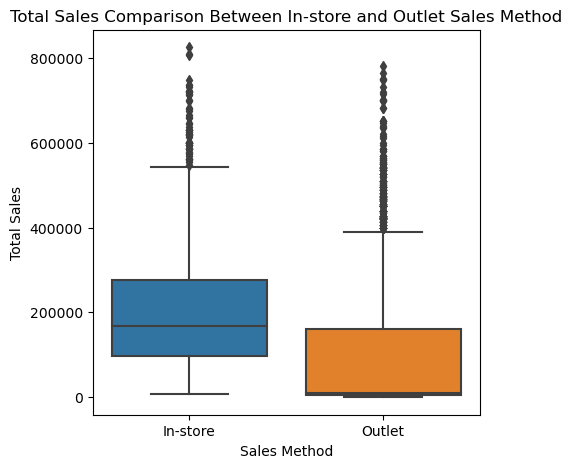

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for "In-store" and "Outlet" sales methods
In_store_data = sales_data[sales_data['Sales Method'] == 'In-store']['Total Sales']
outlet_data = sales_data[sales_data['Sales Method'] == 'Outlet']['Total Sales']

# Combine the data into a single DataFrame for visualization
sales_method_data = pd.concat([In_store_data, outlet_data], axis=1, keys=['In-store', 'Outlet'])

# Plotting the box plot
plt.figure(figsize=(5,5))
sns.boxplot(data=sales_method_data)
plt.title('Total Sales Comparison Between In-store and Outlet Sales Method')
plt.ylabel('Total Sales')
plt.xlabel('Sales Method')
plt.show()

In [15]:
#T-test
t_statistic, p_value = stats.ttest_ind(In_store_data,outlet_data)
# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

T-Statistic: 23.951259164563925
P-value: 8.596978515235122e-120


#  **Khitam**

Linear Regression

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for "In-store" and "Outlet" sales methods and drop NaN values
In_store_data = sales_data[sales_data['Sales Method'] == 'In-store']['Total Sales'].dropna()
outlet_data = sales_data[sales_data['Sales Method'] == 'Outlet']['Total Sales'].dropna()

# Ensure that both datasets have the same number of elements
min_length = min(len(In_store_data), len(outlet_data))
In_store_data = In_store_data[:min_length]
outlet_data = outlet_data[:min_length]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(In_store_data, outlet_data)

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)


Slope: 0.3411431511871808
Intercept: 96162.35647918786
R-squared: 0.08540259477623122
P-value: 1.3253286928714452e-35
Standard Error: 0.02677880668929118


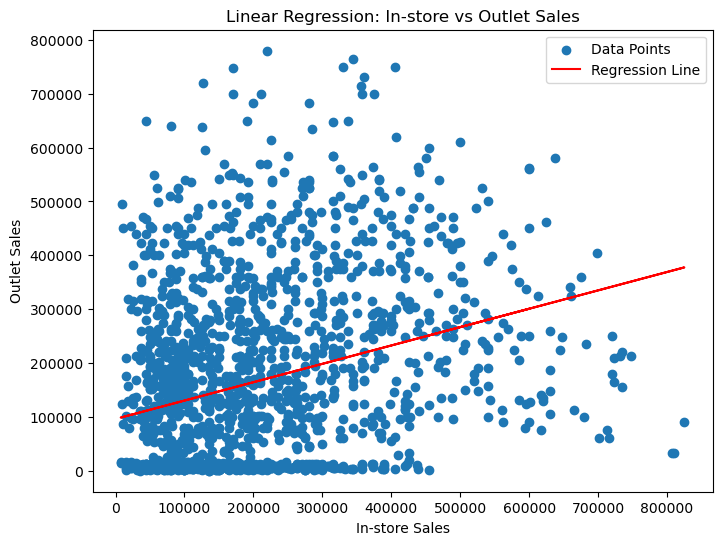

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for "In-store" and "Outlet" sales methods and drop NaN values
In_store_data = sales_data[sales_data['Sales Method'] == 'In-store']['Total Sales'].dropna()
outlet_data = sales_data[sales_data['Sales Method'] == 'Outlet']['Total Sales'].dropna()

# Ensure that both datasets have the same number of elements
min_length = min(len(In_store_data), len(outlet_data))
In_store_data = In_store_data[:min_length]
outlet_data = outlet_data[:min_length]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(In_store_data, outlet_data)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(In_store_data, outlet_data, label='Data Points')

# Plot the regression line
plt.plot(In_store_data, slope*In_store_data + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('In-store Sales')
plt.ylabel('Outlet Sales')
plt.title('Linear Regression: In-store vs Outlet Sales')
plt.legend()

# Display the plot
plt.show()


In the scatter plot with the regression line, each point represents a pair of "In-store" and "Outlet" sales values for a specific observation. The regression line shows the relationship between these two variables as modeled by the linear regression. 

- **Direction of the Line**: The upward slope of the line indicates a positive relationship between "In-store" and "Outlet" sales. This means that as "In-store" sales increase, "Outlet" sales also tend to increase.

- **Strength of the Relationship**: The tighter the points cluster around the line, the stronger the relationship between the two variables. If the points are more spread out, the relationship is weaker.

- **Outliers**: Any points that deviate significantly from the line may be considered outliers, indicating observations where the relationship between "In-store" and "Outlet" sales does not follow the overall trend.

- **Regression Line Fit**: The regression line represents the best-fit line through the data points. It minimizes the sum of the squared differences between the observed and predicted values, providing an optimal linear model for the relationship.

- **Intercept and Slope**: The intercept (where the line crosses the y-axis) and slope of the line are the parameters of the linear model. The intercept represents the expected "Outlet" sales when "In-store" sales are zero, and the slope represents the change in "Outlet" sales for a one-unit increase in "In-store" sales.

Overall, the plot suggests a positive linear relationship between "In-store" and "Outlet" sales, with the regression line providing a reasonable approximation of this relationship.

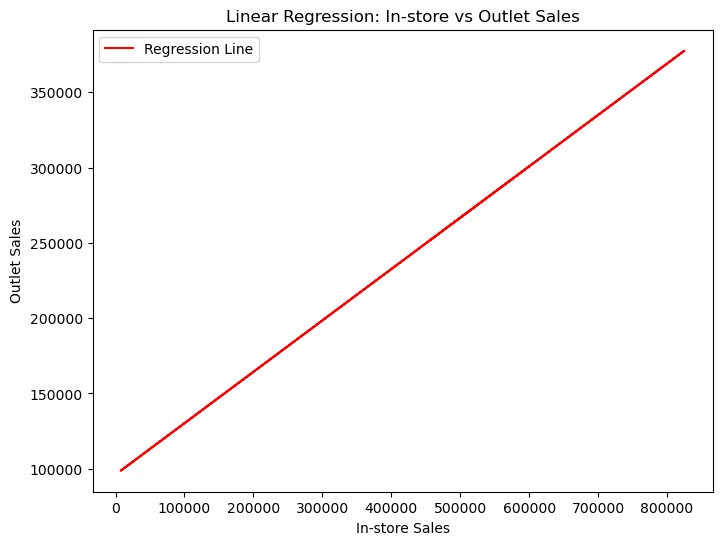

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for "In-store" and "Outlet" sales methods and drop NaN values
In_store_data = sales_data[sales_data['Sales Method'] == 'In-store']['Total Sales'].dropna()
outlet_data = sales_data[sales_data['Sales Method'] == 'Outlet']['Total Sales'].dropna()

# Ensure that both datasets have the same number of elements
min_length = min(len(In_store_data), len(outlet_data))
In_store_data = In_store_data[:min_length]
outlet_data = outlet_data[:min_length]

# Combine the data into a single DataFrame for visualization
combined_data = pd.DataFrame({'In-store': In_store_data, 'Outlet': outlet_data, 'Sales Method': ['In-store']*len(In_store_data) + ['Outlet']*len(outlet_data)})

# Plot the scatter plot with different colors for each category
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_data, x='In-store', y='Outlet', hue='Sales Method')
plt.plot(In_store_data, slope*In_store_data + intercept, color='red', label='Regression Line')  # Add the regression line
plt.xlabel('In-store Sales')
plt.ylabel('Outlet Sales')
plt.title('Linear Regression: In-store vs Outlet Sales')
plt.legend()

# Display the plot
plt.show()


/tmp/ipykernel_176/3788421286.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens_apparel_data['Invoice Date Numeric'] = pd.to_numeric(womens_apparel_data['Invoice Date'])


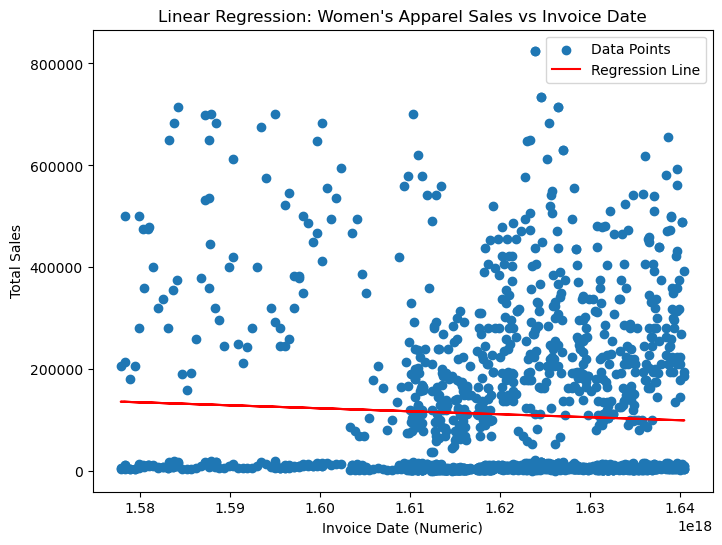

Slope: -5.852755043072042e-13
Intercept: 1059849.1243097098
R-squared: 0.0027106811716492182
P-value: 0.036837510809676406
Standard Error: 2.8012956161538934e-13


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for "Men's Apparel"
womens_apparel_data = df[df['Product'] == "Women's Apparel"]

# Convert 'Invoice Date' to numeric format for linear regression
womens_apparel_data['Invoice Date Numeric'] = pd.to_numeric(womens_apparel_data['Invoice Date'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(womens_apparel_data['Invoice Date Numeric'], womens_apparel_data['Total Sales'])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(womens_apparel_data['Invoice Date Numeric'], womens_apparel_data['Total Sales'], label='Data Points')

# Plot the regression line
plt.plot(womens_apparel_data['Invoice Date Numeric'], slope*womens_apparel_data['Invoice Date Numeric'] + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Invoice Date (Numeric)')
plt.ylabel('Total Sales')
plt.title("Linear Regression: Women's Apparel Sales vs Invoice Date")
plt.legend()

# Display the plot
plt.show()

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)


/tmp/ipykernel_176/2753801245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens_apparel_data['Invoice Date Numeric'] = pd.to_numeric(womens_apparel_data['Invoice Date'])
/tmp/ipykernel_176/2753801245.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens_apparel_data['Predicted Sales'] = slope * womens_apparel_data['Invoice Date Numeric'] + intercept


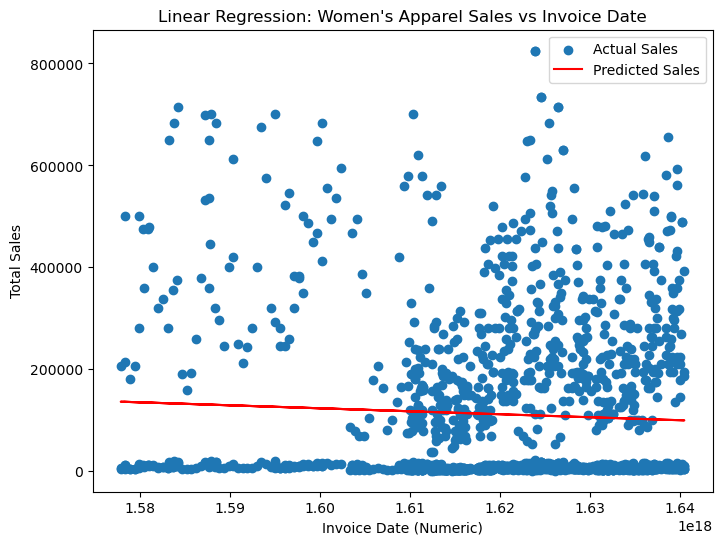

3  Invoice Date  Total Sales  Predicted Sales
5    2020-01-06     500000.0    136127.056457
11   2020-01-24     500000.0    135216.835993
17   2020-01-30     475000.0    134913.429172
23   2020-02-05     475000.0    134610.022350
29   2020-03-03     650000.0    133244.691654


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for "Men's Apparel"
womens_apparel_data = df[df['Product'] == "Women's Apparel"]

# Convert 'Invoice Date' to numeric format for linear regression
womens_apparel_data['Invoice Date Numeric'] = pd.to_numeric(womens_apparel_data['Invoice Date'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(womens_apparel_data['Invoice Date Numeric'], womens_apparel_data['Total Sales'])

# Calculate predicted values
womens_apparel_data['Predicted Sales'] = slope * womens_apparel_data['Invoice Date Numeric'] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(womens_apparel_data['Invoice Date Numeric'], womens_apparel_data['Total Sales'], label='Actual Sales')
plt.plot(womens_apparel_data['Invoice Date Numeric'], womens_apparel_data['Predicted Sales'], color='red', label='Predicted Sales')
plt.xlabel('Invoice Date (Numeric)')
plt.ylabel('Total Sales')
plt.title("Linear Regression: Women's Apparel Sales vs Invoice Date")
plt.legend()
plt.show()

# Display the first few rows of the data with predicted sales
print(womens_apparel_data[['Invoice Date', 'Total Sales', 'Predicted Sales']].head())


# **MonteCarlo**

In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 1000

num_periods = 12  

historical_sales = womens_apparel_data['Total Sales'].values

historical_growth_rate = np.diff(historical_sales) / historical_sales[:-1]

mu = historical_growth_rate.mean()
sigma = historical_growth_rate.std()



In [22]:
simulated_sales = np.zeros((num_simulations, num_periods))

for i in range(num_simulations):
    simulated_sales[i, 0] = historical_sales[-1]
    
    for j in range(1, num_periods):
        growth_rate = np.random.normal(mu, sigma)
        
        simulated_sales[i, j] = simulated_sales[i, j - 1] * (1 + growth_rate)


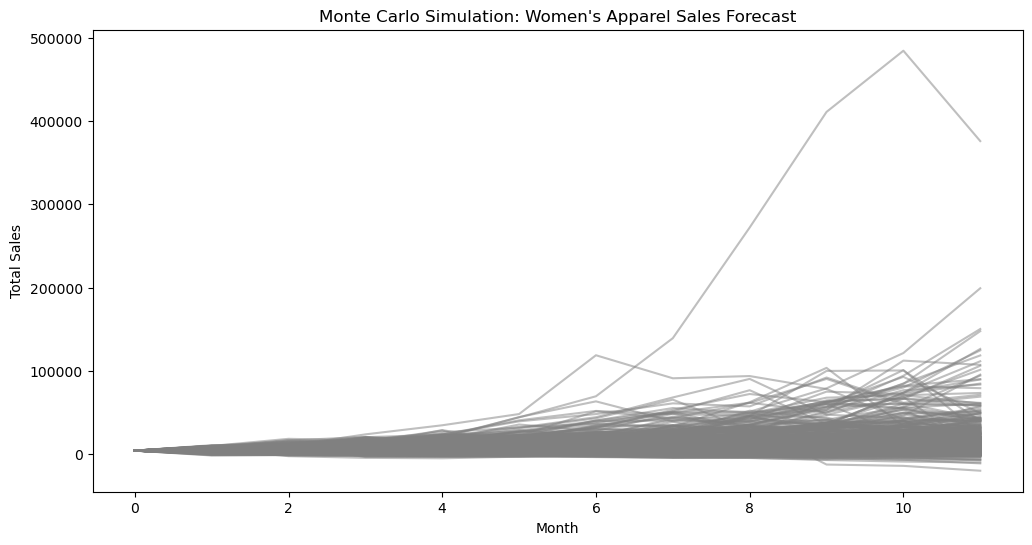

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_periods), simulated_sales.T, color='gray', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Monte Carlo Simulation: Women's Apparel Sales Forecast")
plt.show()


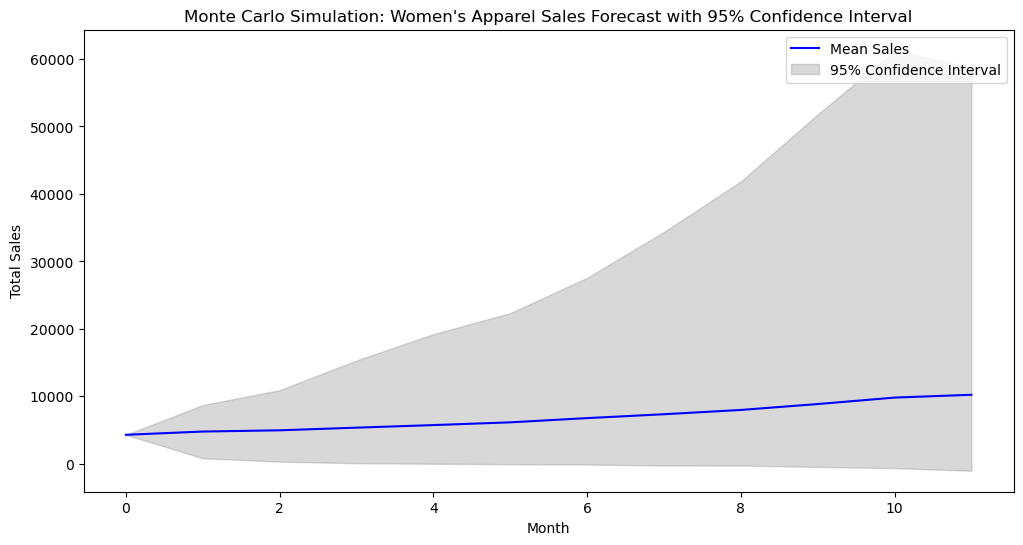

In [24]:
# Calculate the mean and 95% confidence interval of the simulated sales data
mean_sales = simulated_sales.mean(axis=0)
lower_bound = np.percentile(simulated_sales, 2.5, axis=0)
upper_bound = np.percentile(simulated_sales, 97.5, axis=0)

# Plot the mean and 95% confidence interval of the simulated sales data
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_periods), mean_sales, color='blue', label='Mean Sales')
plt.fill_between(np.arange(num_periods), lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Monte Carlo Simulation: Women's Apparel Sales Forecast with 95% Confidence Interval")
plt.legend()
plt.show()


In [25]:
import pandas as pd

# Calculate mean and confidence interval
mean_sales = simulated_sales.mean(axis=0)
lower_bound = np.percentile(simulated_sales, 2.5, axis=0)
upper_bound = np.percentile(simulated_sales, 97.5, axis=0)

# Create a DataFrame
sales_forecast_df = pd.DataFrame({
    'Month': np.arange(num_periods),
    'Mean Sales': mean_sales,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

# Print the DataFrame
print(sales_forecast_df)


    Month    Mean Sales  Lower Bound   Upper Bound
0       0   4305.000000  4305.000000   4305.000000
1       1   4787.569182   830.181925   8716.680357
2       2   4970.306575   326.196995  10922.193639
3       3   5363.976342    98.870553  15324.278597
4       4   5745.013244    15.682125  19223.208401
5       5   6151.519967   -53.921285  22338.263211
6       6   6778.518066  -100.481010  27563.609528
7       7   7352.751870  -244.000740  34371.824032
8       8   7988.368033  -249.509240  41849.227432
9       9   8861.834711  -459.251180  51795.611343
10     10   9819.259300  -631.771933  61225.806020
11     11  10236.854714 -1018.413877  58714.140399
